# Manifold Learning - The S Dataset

## Example code is using the following template
http://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html
    
### Author: Jake Vanderplas -- <vanderplas@astro.washington.edu>

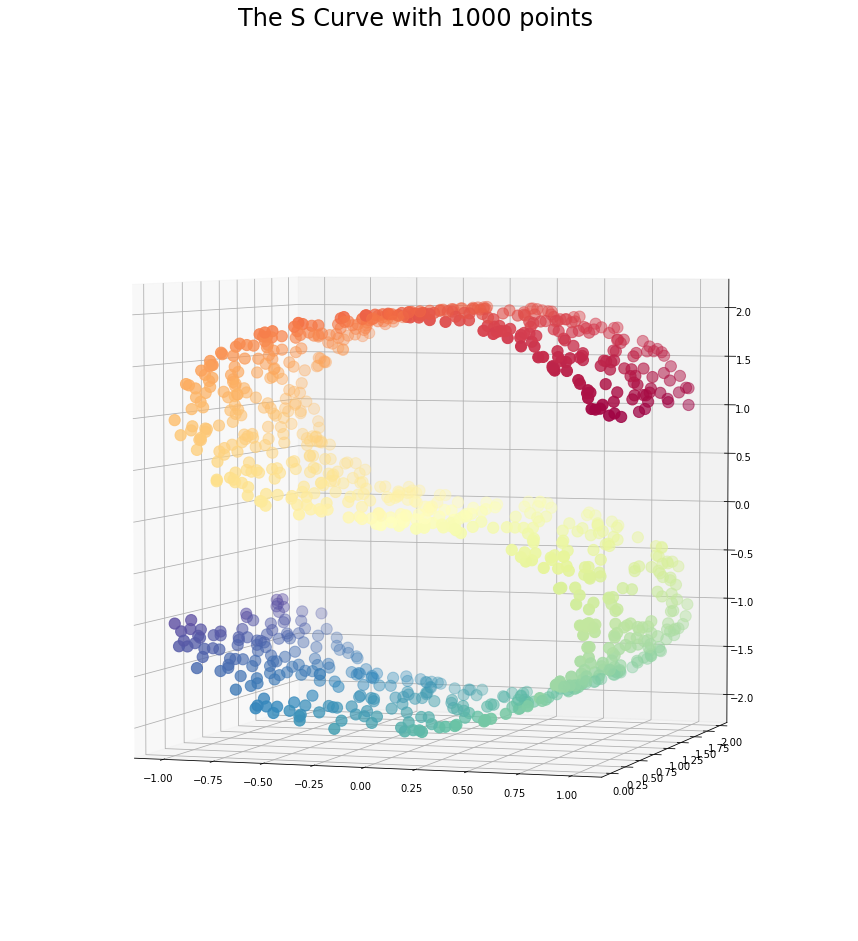

In [1]:
# Adjustments by S.Kuehn, stefan.kuehn@xing.com

from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
%matplotlib inline
from sklearn import manifold, datasets

n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)

fig = plt.figure(figsize=(15, 15))
plt.suptitle("The S Curve with %i points"
             % (n_points), fontsize=24)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral, s=125)
ax.view_init(4, -72)

## Manifold Learning Methods

LLE: 0.11 sec
LTSA: 0.26 sec
MDS: 3.3 sec


(-2.071062722786173, 2.051192446273548, -2.4158334578191303, 2.526108691168792)

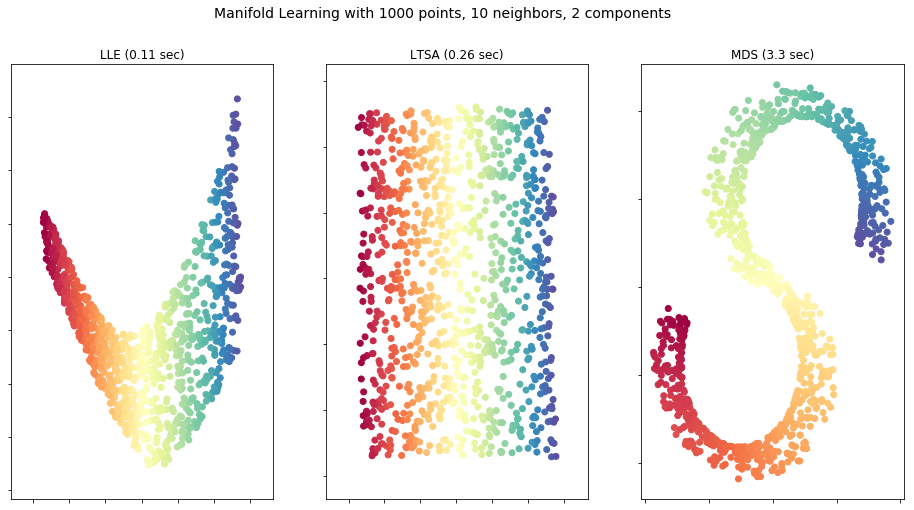

In [4]:
# Let's re-run the example
# In case you experience problems with any of the methods that are using eigen_solver='auto', try switching to eigen_solver='dense'
# Runtime for more than 1000 points can be up to 2 minutes


n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(16, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors, %i components"
             % (n_points, n_neighbors, n_components), fontsize=14)

t0 = time()
Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                    method='standard').fit_transform(X)
t1 = time()
print("LLE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(131)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("LLE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')



t0 = time()
Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                    method='ltsa').fit_transform(X)
t1 = time()
print("LTSA: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(132)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("LTSA (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(133)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

## Exercise

* from http://scikit-learn.org/stable/modules/manifold.html choose a manifold learning method you you like
* add it to this notebook and compare it to the results of the other methods
* experiment with the parameters of the methods
* if you do not like any method use T-SNE